In [32]:
import pandas as pd

# get data with reviews (already containing only the 10,000 most active users and price score)
reviews = pd.read_csv('processed_data/reviews_price_score.csv')

In [33]:
# get distribution of stars rating
stars_data = reviews.groupby('stars').count()
stars_data['review_id'] = stars_data['review_id'] / reviews.shape[0]

# check percentages
stars_data

,review_id,user_id,business_id,useful,funny,cool,text,date,price_score
stars,,,,,,,,,
1.0,0.053227,67174,67174,67174,67174,67174,67174,67174,67174
2.0,0.076483,96524,96524,96524,96524,96524,96524,96524,96524
3.0,0.171767,216776,216776,216776,216776,216776,216776,216776,216776
4.0,0.348316,439588,439588,439588,439588,439588,439588,439588,439588
5.0,0.350208,441976,441976,441976,441976,441976,441976,441975,441976


In [34]:
import random
from tqdm.notebook import tqdm

# important for reproducible results
random.seed(0)

# naive simulator
sample_list = 35 * [5] + 35 * [4] + 17 * [3] + 8 * [2] + 5 * [1]
naive_ratings = []
for i in tqdm(range(reviews.shape[0])):
    naive_ratings.append(random.choice(sample_list))

# add column to the review df
reviews['naive_rating'] = naive_ratings

# check if new column works
reviews

  0%|          | 0/1262038 [00:00<?, ?it/s]

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,price_score,naive_rating
0,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4.0,1.0,0.0,1.0,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15,1.263071,4
1,8JFGBuHMoiNDyfcxuWNtrA,smOvOajNG0lS4Pq7d8g4JQ,RZtGWDLCAtuipwaZ-UfjmQ,4.0,0.0,0.0,0.0,Good food--loved the gnocchi with marinara\nth...,2009-10-14 19:57:14,2.497299,1
2,LnGZB0fjfgeVDVz5IHuEVA,j2wlzrntrbKwyOcOiB3l3w,rBdG_23USc7DletfZ11xGA,4.0,1.0,0.0,0.0,The hubby and I have been here on multiple occ...,2014-08-10 19:41:43,2.750729,4
3,Xs8Z8lmKkosqW5mw_sVAoA,IQsF3Rc6IgCzjVV9DE8KXg,eFvzHawVJofxSnD7TgbZtg,5.0,0.0,0.0,0.0,My absolute favorite cafe in the city. Their b...,2014-11-12 15:30:27,1.229286,5
4,lUUhg8ltDsUZ9h0xnwY4Dg,RreNy--tOmXMl1en0wiBOg,cPepkJeRMtHapc_b2Oe_dw,4.0,1.0,0.0,1.0,I was really between 3 and 4 stars for this on...,2018-07-17 03:30:07,1.904357,5
...,...,...,...,...,...,...,...,...,...,...,...
1262033,YVX1Wsa4LYxjvFwuHBb_gA,RKPkxOYQlM0BjhM-H6_vAw,X4mouE_cMiwbfyCPZ_K-FA,4.0,3.0,0.0,2.0,"Good, maybe very good. I went for lunch, so t...",2015-01-23 23:52:03,2.093681,4
1262034,H0RIamZu0B0Ei0P4aeh3sQ,qskILQ3k0I_qcCMI-k6_QQ,jals67o91gcrD4DC81Vk6w,5.0,1.0,2.0,1.0,Latest addition to services from ICCU is Apple...,2014-12-17 21:45:20,2.549610,4
1262035,YNfNhgZlaaCO5Q_YJR4rEw,mm6E4FbCMwJmb7kPDZ5v2Q,R1khUUxidqfaJmcpmGd4aw,4.0,1.0,0.0,0.0,This Home Depot won me over when I needed to g...,2019-12-30 03:56:30,2.534315,5
1262036,i-I4ZOhoX70Nw5H0FwrQUA,YwAMC-jvZ1fvEUum6QkEkw,Rr9kKArrMhSLVE9a53q-aA,5.0,1.0,0.0,0.0,For when I'm feeling like ignoring my calorie-...,2022-01-19 18:59:27,2.042872,5


In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

ids = reviews.groupby('user_id').count().reset_index()['user_id'].tolist()
sns.set_style('white')

def plot_expectation_distribution(reviews_df, user_ids, ratings_column, saving_path='none'):
    user_expectations = create_expectation_dataframe(reviews_df, user_ids, ratings_column)
    sns.histplot(data=user_expectations, x='expectation', color=[0.6, 0.6, 1.0], fill=True)
    if saving_path != 'none':
        plt.savefig(saving_path, dpi=200)
        print('saved')
    plt.show()

def create_expectation_dataframe(reviews_df, user_ids, ratings_column):

    user_expectation = {}
    for user in tqdm(user_ids):
        user_reviews = reviews_df[reviews_df['user_id'] == user]
        user_expectation[user] = user_reviews[['price_score', ratings_column]].corr().iloc[0, 1]

    user_expectations = pd.DataFrame.from_dict(user_expectation, orient='index').reset_index()
    user_expectations = user_expectations.rename(columns={"index": "user_id", 0: "correlation"})
    user_expectations['expectation'] = 0.5 * (1 - user_expectations['correlation'])

    return user_expectations

  0%|          | 0/10000 [00:00<?, ?it/s]

saved


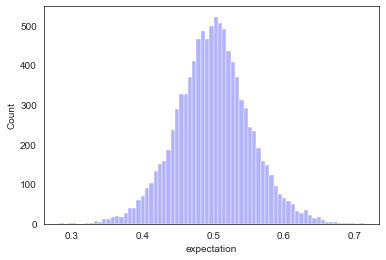

In [36]:
# generate plot for naive ratings
plot_expectation_distribution(reviews, ids, 'naive_rating', 'figures/naive_user_expectations.png')

In [37]:
traditional_expectations = create_expectation_dataframe(reviews, ids, 'stars')
naive_expectations = create_expectation_dataframe(reviews, ids, 'naive_rating')

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

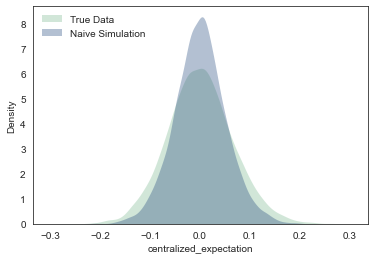

In [54]:
# centralize the data
traditional_expectations['centralized_expectation'] = traditional_expectations['expectation'] - traditional_expectations['expectation'].mean()
naive_expectations['centralized_expectation'] = naive_expectations['expectation'] - naive_expectations['expectation'].mean()

#plot the data
sns.set_palette('crest')
sns.kdeplot(data=traditional_expectations, x='centralized_expectation', fill=True, label='True Data', linewidth=0, color=sns.color_palette('crest')[0], alpha=.35)
sns.kdeplot(data=naive_expectations, x='centralized_expectation', fill=True, label='Naive Simulation', linewidth=0, color=sns.color_palette('crest')[5], alpha=.35)
plt.legend(loc=2, frameon=False)

# show and save plot
plt.savefig('figures/expectation_comparison.png', dpi=250)
plt.show()

In [52]:
sns.color_palette('crest')

[(0.48942421, 0.72854938, 0.56751036),
 (0.34892097, 0.64828676, 0.56513633),
 (0.24929311, 0.56486397, 0.5586654),
 (0.15615526, 0.47913212, 0.54850526),
 (0.11131735, 0.39155635, 0.53422678),
 (0.14573579, 0.29354139, 0.49847009)]